
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Investigating a dataset with python is very powerful and useful, it opens the gate for us to ask many questions about our data and analysis it in many diffrent ways to find intersting conclsuions that we may use to assist in important decisons.
It also make it easier to communicate and visualize  these findings.
for this project we will Investigate a Dataset with the help of some useful libraries like pandas matplotlip and other libraries.
we will also try to answer some questions about the dataset.

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
We shall Investigate it based on genres.


### Question(s) for Analysis
Some of the questions we tried to answer in this project are:
what is the most popular genre proudced?
Which genres have the highest mean rate?
Which genres are getting more releases year by year?
what is the relation between genres and revenur?
what is the relation between the genre and runtime?
which genres get more vote_count?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We import the libraries we need for the project

In [2]:
 !pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


We Upgrade pandas to use dataframe.explode() function.

<a id='wrangling'></a>
## Data Wrangling and cleaning



In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We read our data file and check the first 5 rows for insights.
it seems that genres cloumn format  may require some tweaking and investigation to figure out how we will use it for analysis. 

In [4]:
df['genres'].nunique()

2039

2039 genres and we have only 10866 entries, this is so interesting and means that we can't use it as it is.
maybe tweaking it will be better.
but we will investigate more before doing this.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

we have 10866 entry and we shall clean the data while doing some more investigations to determine how we should clean it.
also there are some cloumns that we will drop because we don't need them in our analysis, and those are ['id', 'imdb_id', 'homepage', 'production_companies', 'keywords', 'overview','director', 'cast', 'tagline', 'budget_adj', 'revenue_adj'].

In [6]:
drop_cloumn=['id', 'imdb_id', 'homepage', 'production_companies', 'keywords', 'overview','director', 'cast', 'tagline', 'budget_adj', 'revenue_adj']
df.drop( drop_cloumn, axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 849.0+ KB


Because our main foucs in analysis is genre we will drop null values as they will not be helpful in the analysis.

In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 931.8+ KB


Now this looks nice, let's investigate some more.

In [10]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000
mean,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595
std,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


Well the only thing that catched my eye was popularity max ,mean and std but because i don't know the criteria it follows i will leave it as it is.

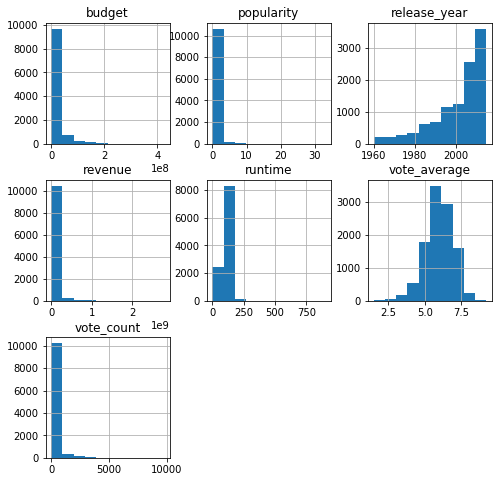

In [11]:
df.hist(figsize=(8,8));

This fig gave us some inights that we shall use later in analysis and investigation.
for example: the number of films released is increasing every year 
most of the movies votes will be between 5 and 7.5.
vote count for most of the movies will be much less 5000.

Now let's think how we will deal with genres column.

In [12]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [13]:
unique_gen=set(df['genres'].str.split('|').sum())
u_genres=list(sorted(unique_gen))
print(u_genres)
print(len(u_genres))

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
20


so we have 20 genres to choose from.

let's see if we can make this column ready for the .explode() mehtod.

In [14]:
df['genres']=df['genres'].str.split('|')
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015


now we made the genres column ready to use explode() method on

In [15]:
df.explode('genres')

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,6.5,2015
0,32.985763,150000000,1513528810,Jurassic World,124,Adventure,6/9/15,5562,6.5,2015
0,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,6/9/15,5562,6.5,2015
0,32.985763,150000000,1513528810,Jurassic World,124,Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Adventure,5/13/15,6185,7.1,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Science Fiction,5/13/15,6185,7.1,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,3/18/15,2480,6.3,2015
2,13.112507,110000000,295238201,Insurgent,119,Science Fiction,3/18/15,2480,6.3,2015


In [16]:
df= df.explode('genres')

This dataframe is ready for some action!!

<a id='eda'></a>
## Exploratory Data Analysis




### Research Questions that will be answered by bar chart

for  our first question we will ask what is the most popular genre proudced?

Text(0,0.5,'Count')

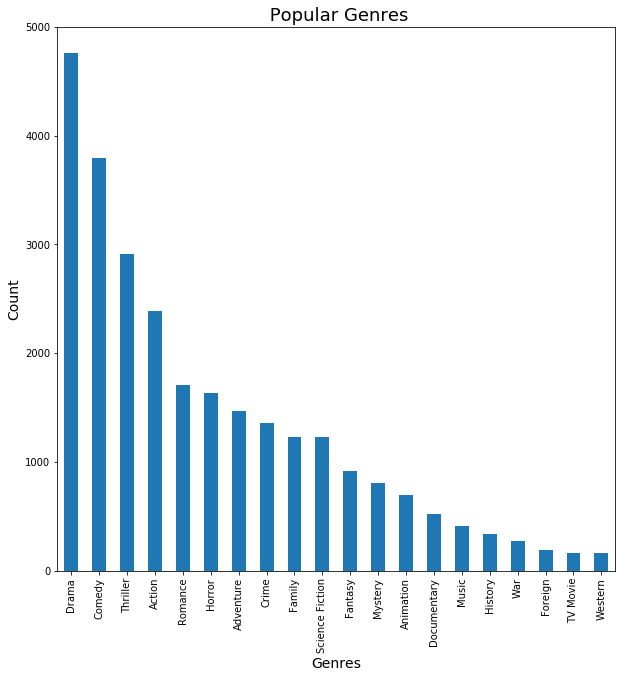

In [17]:
df['genres'].value_counts().plot(kind='bar',figsize=(10,10));
plt.title(' Popular Genres', fontsize=18)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Count', fontsize=14)




hmmm so drama is the most popular genre that is proudced .
let's ask more specific question like Which genres have the highest mean rate?

Text(0,0.5,'Mean popularity')

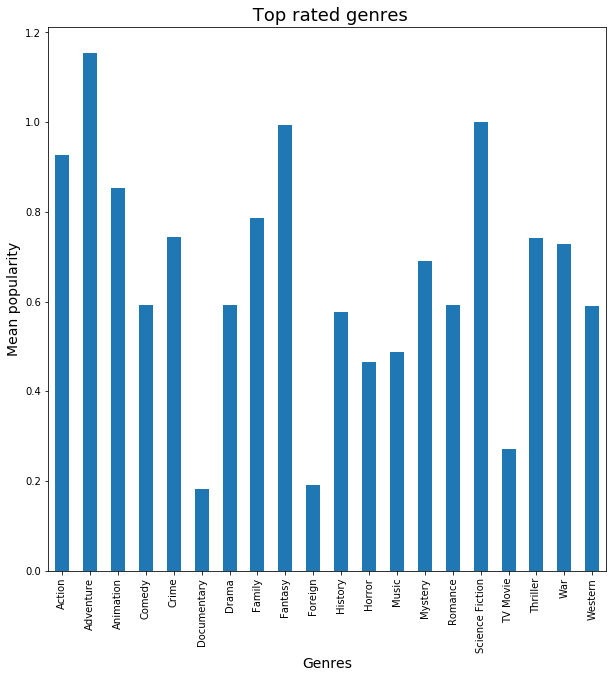

In [18]:
df.groupby('genres')['popularity'].mean().plot(kind='bar',figsize=(10,10));
plt.title(' Top rated genres', fontsize=18)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Mean popularity', fontsize=14)


So according to the chart Adventure is the most popular genre according to the site criteria, while Documentary is the least popular.

Text(0,0.5,'Mean rate')

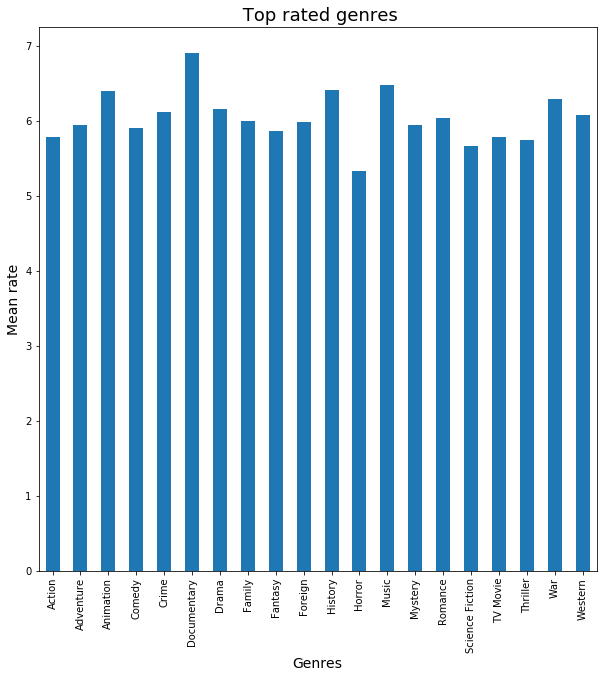

In [19]:
df.groupby('genres')['vote_average'].mean().plot(kind='bar',figsize=(10,10));
plt.title(' Top rated genres', fontsize=18)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Mean rate', fontsize=14)


So people tend to like Documentries and musicals,interesting!
What about Which genres are getting more releases year by year?

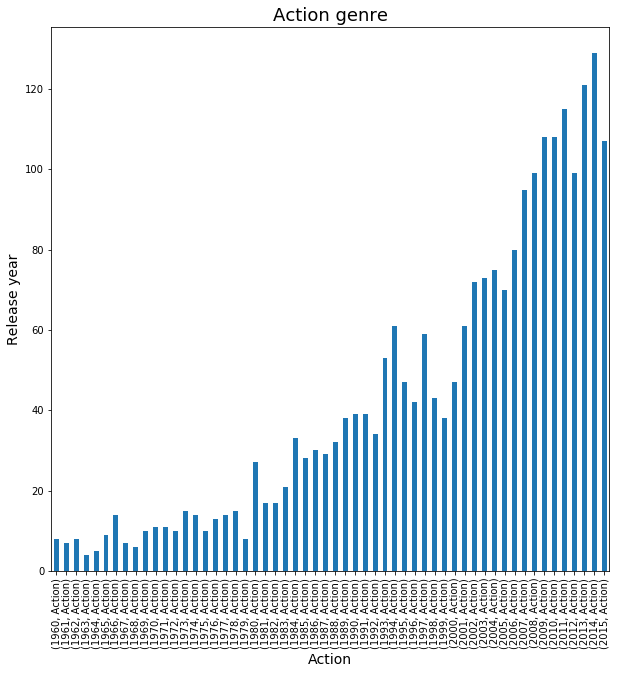

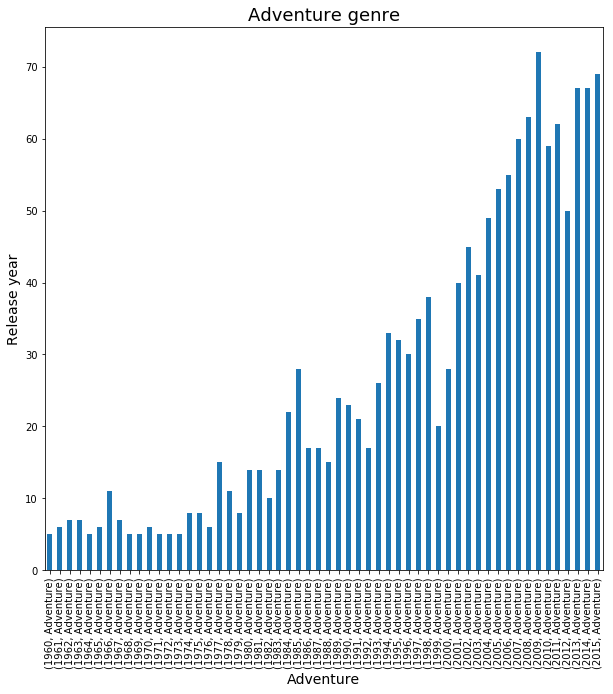

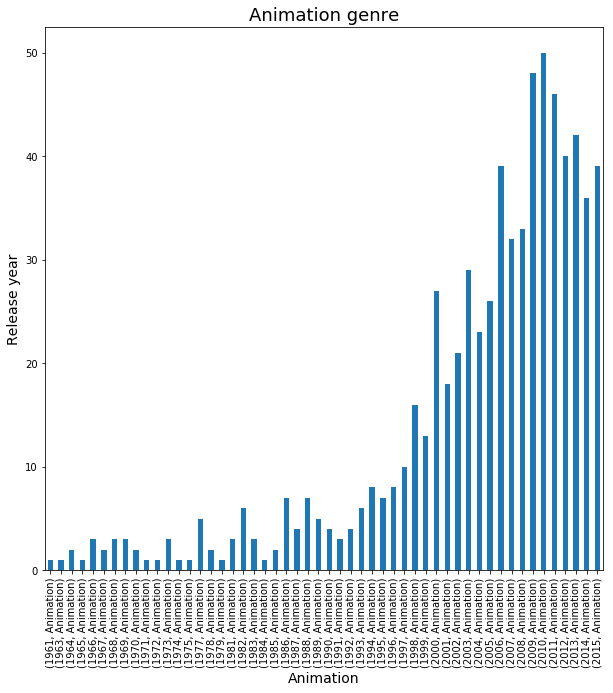

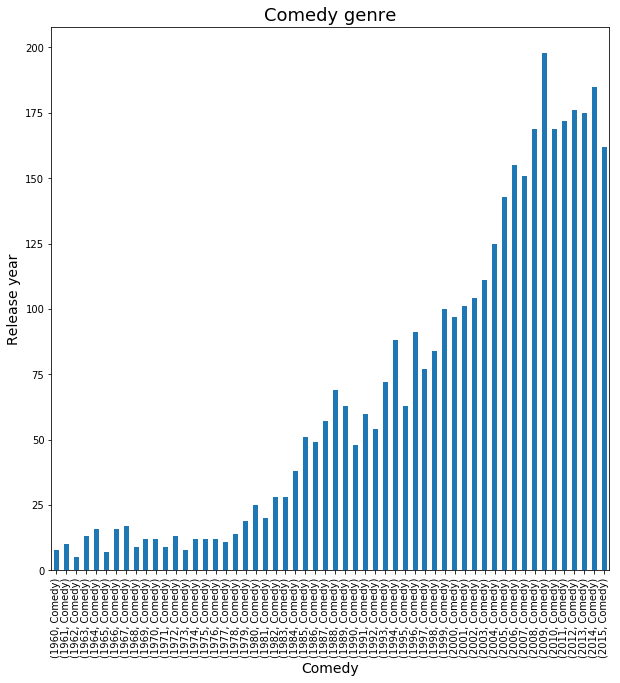

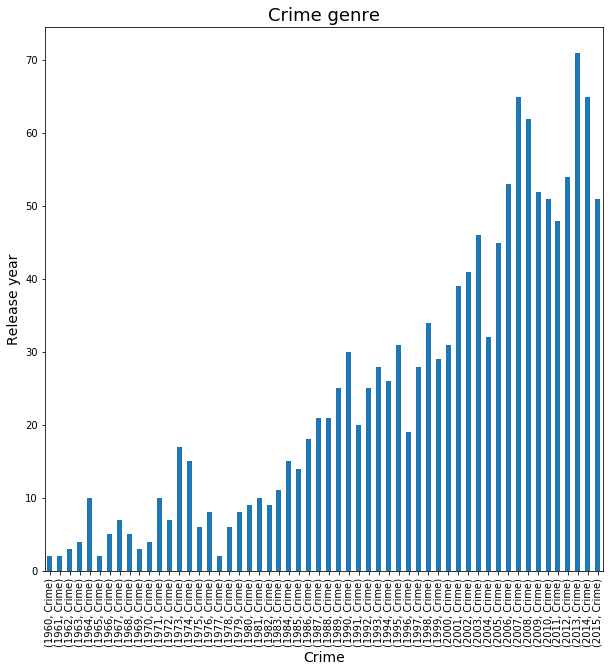

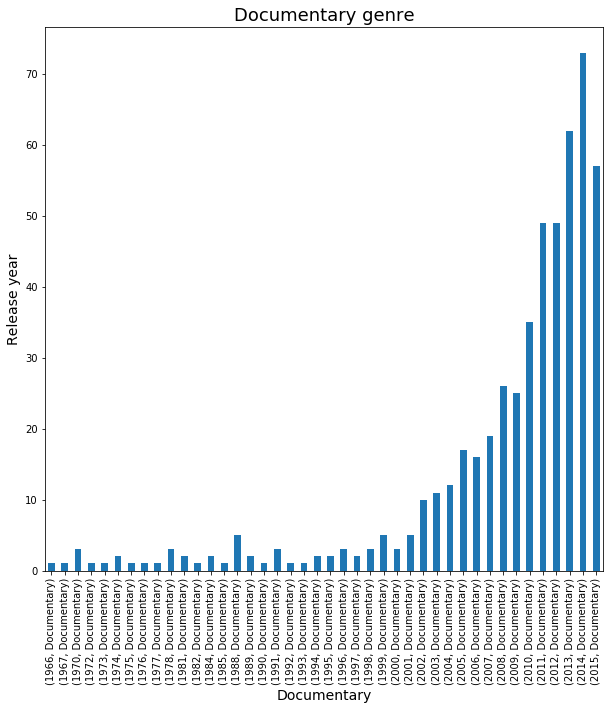

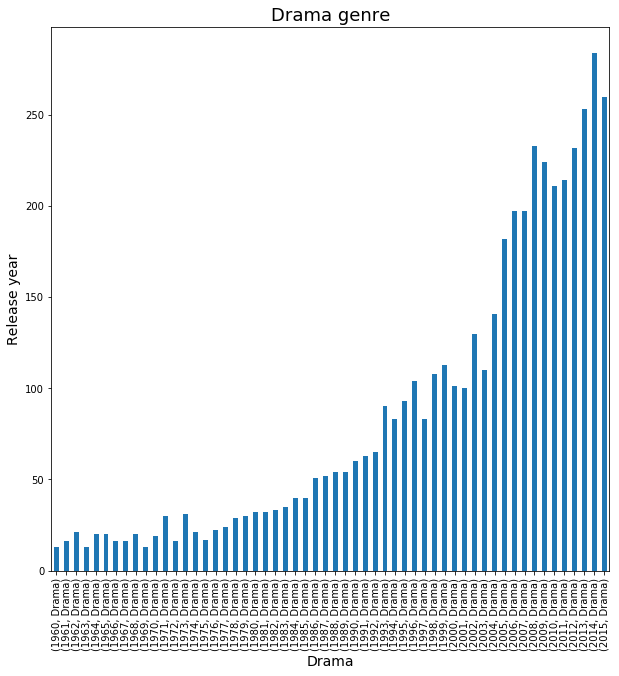

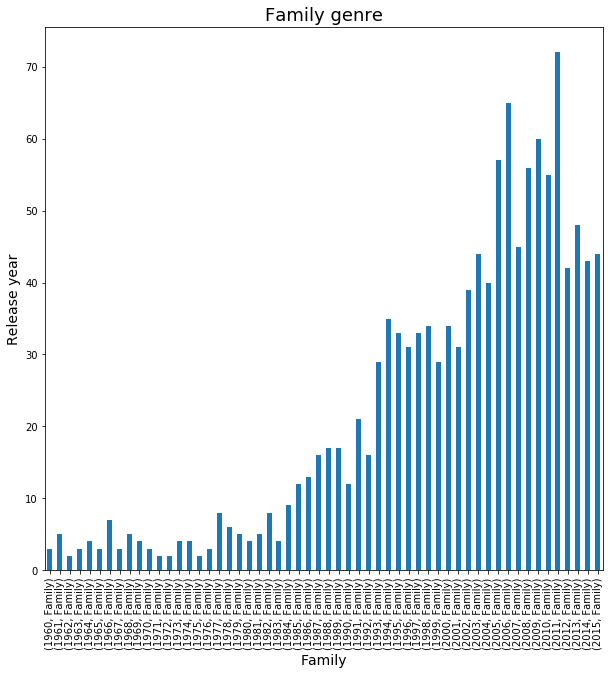

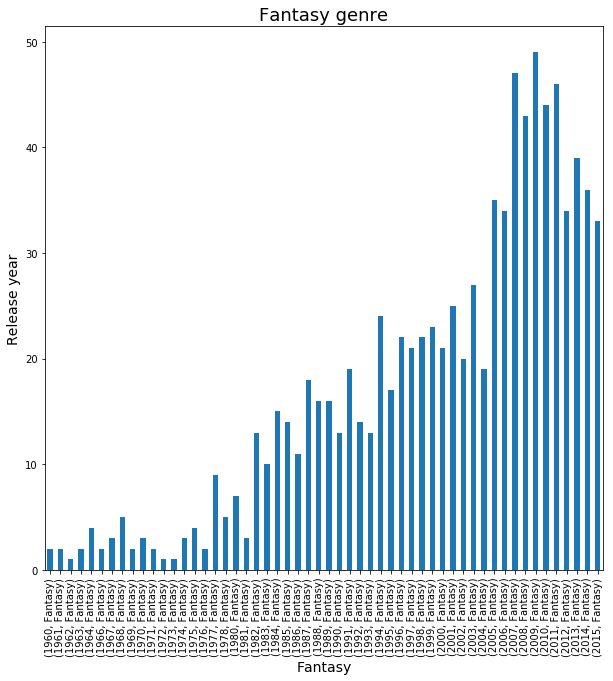

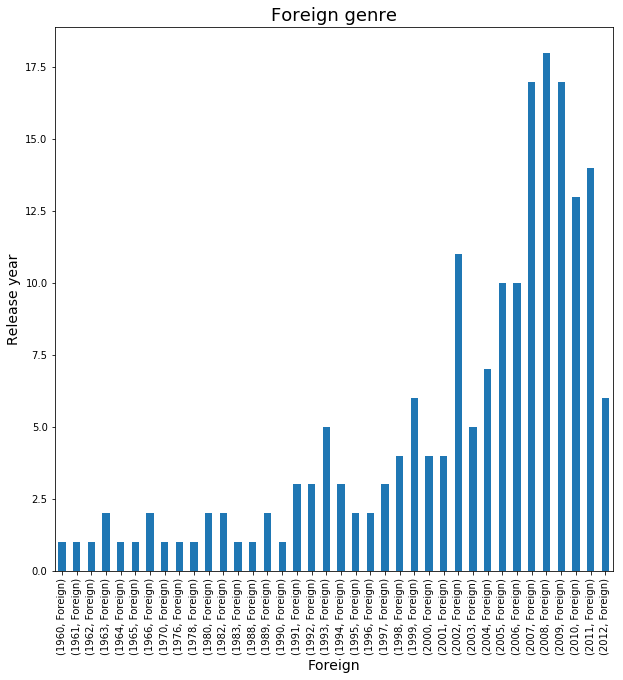

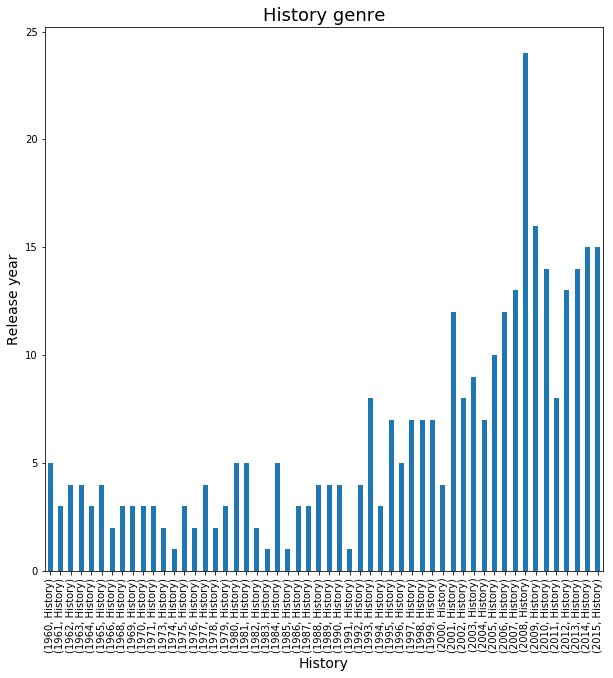

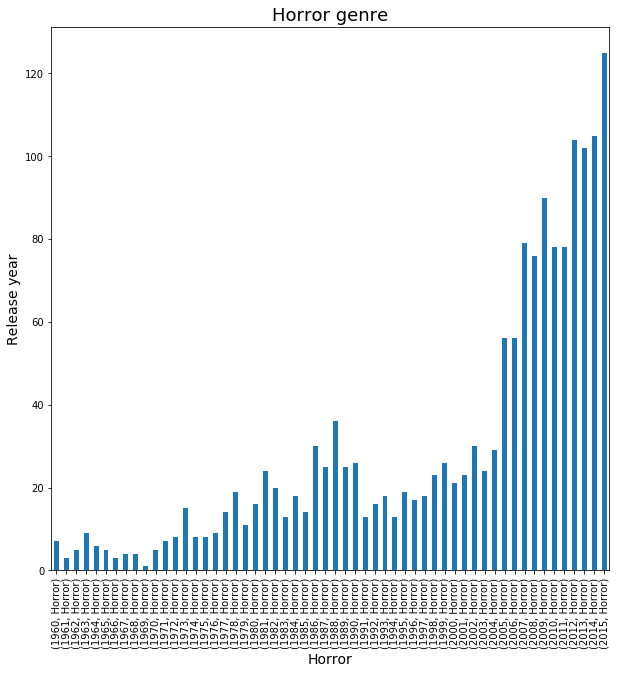

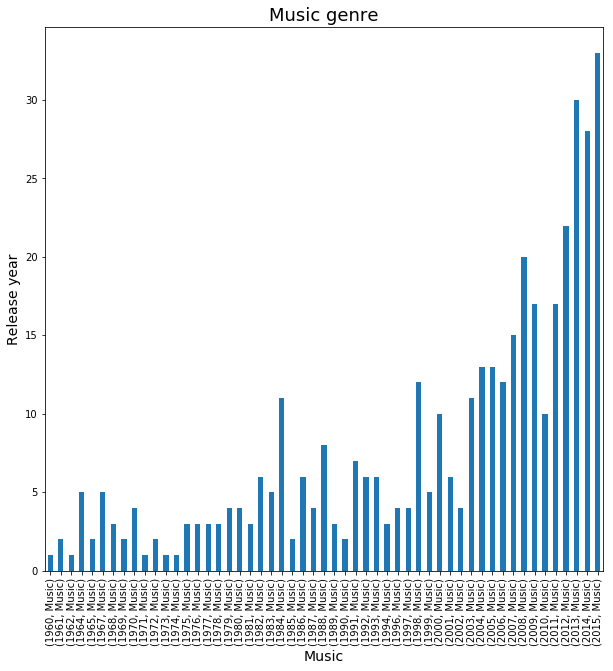

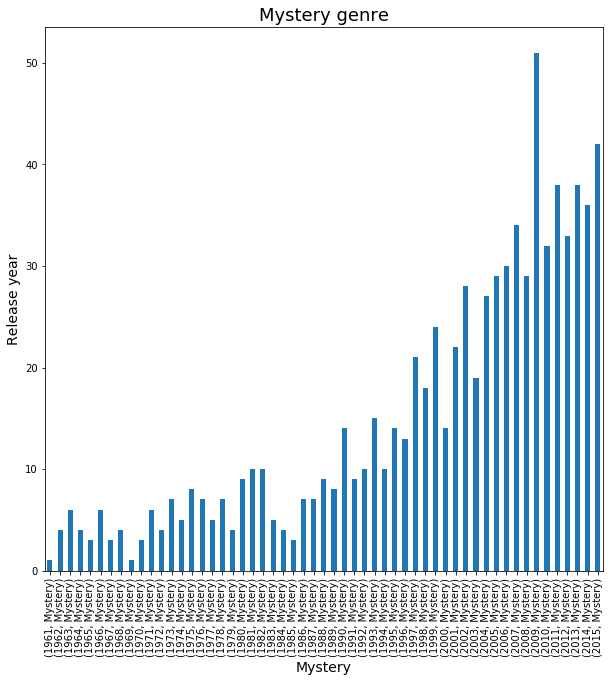

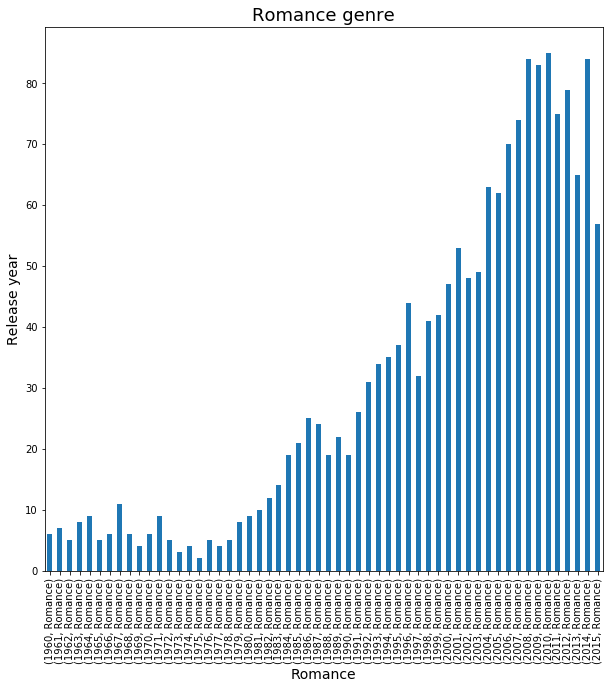

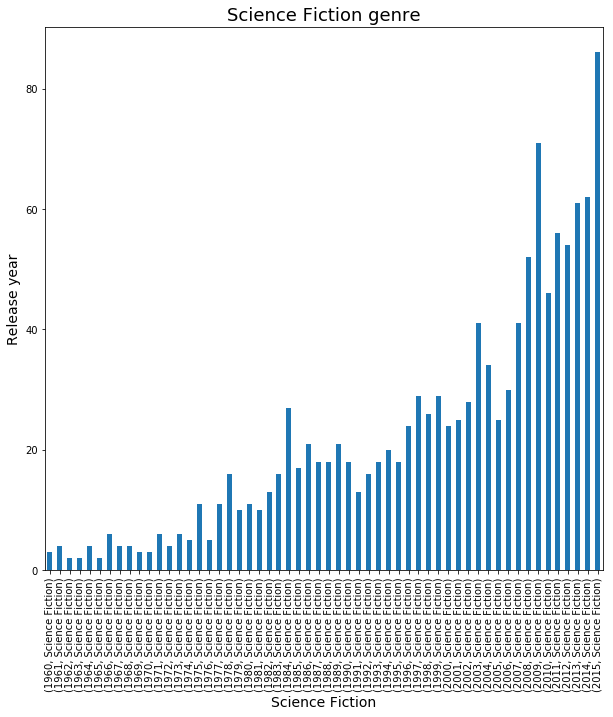

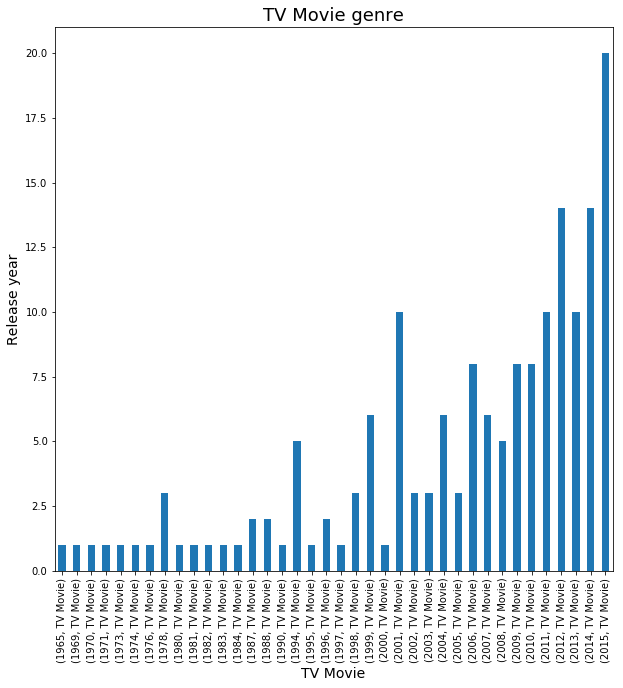

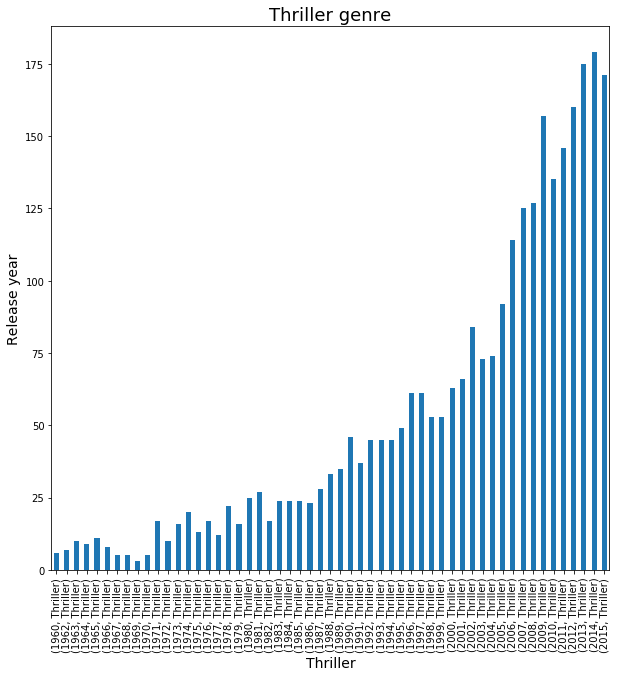

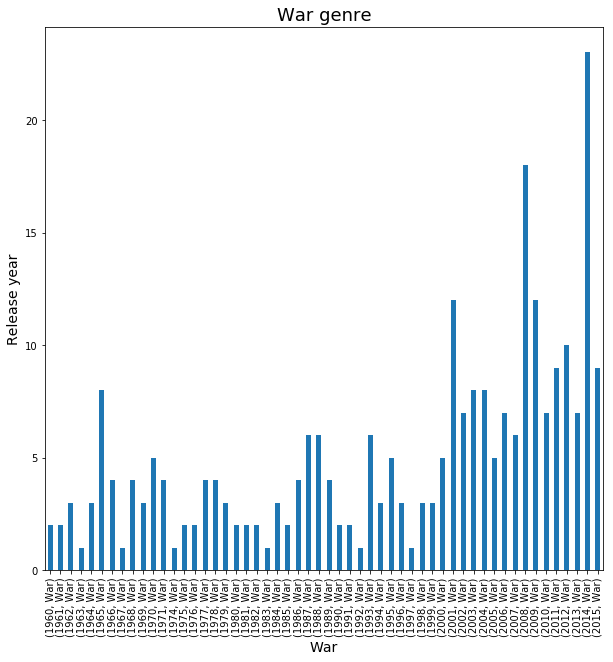

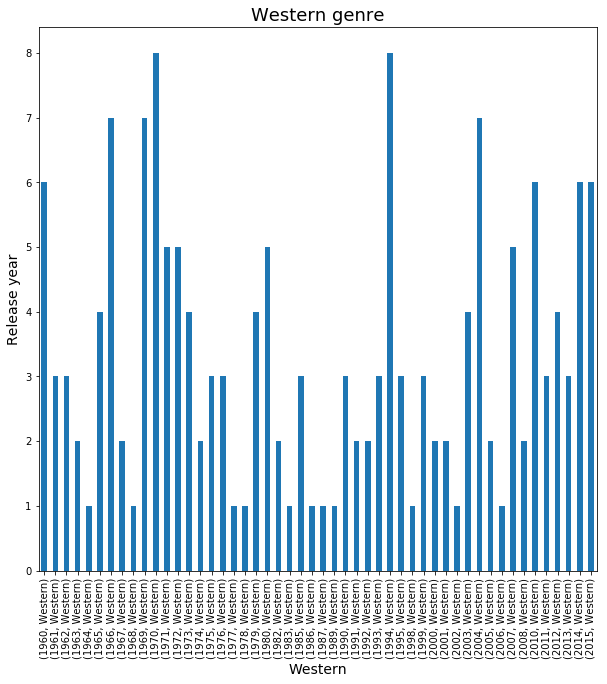

In [20]:
for i in u_genres:
    plt.figure()
    x=df.query('genres == "%s"' % i).groupby('release_year')['genres'].value_counts().plot(kind='bar',figsize=(10,10));
    plt.title('{} genre'.format(i), fontsize=18)
    plt.xlabel(i , fontsize=14)
    plt.ylabel('Release year', fontsize=14)
    plt.show()

Interesting so almost every genre is getting more releases except westeren and war which are fluctuating.


### Research Questions that will be answered by scatter chart
Our first question is what is the relation between genres and revenur?

In [21]:
def scatter(scatter_charts):
    plt.figure(figsize=(18,18))
    plt.scatter(x=df['genres'], y=df[scatter_charts])
    plt.title('Genres vs {}'.format(scatter_charts))
    plt.xlabel('Genres')
    plt.ylabel('{}'.format(scatter_charts))
    plt.show()

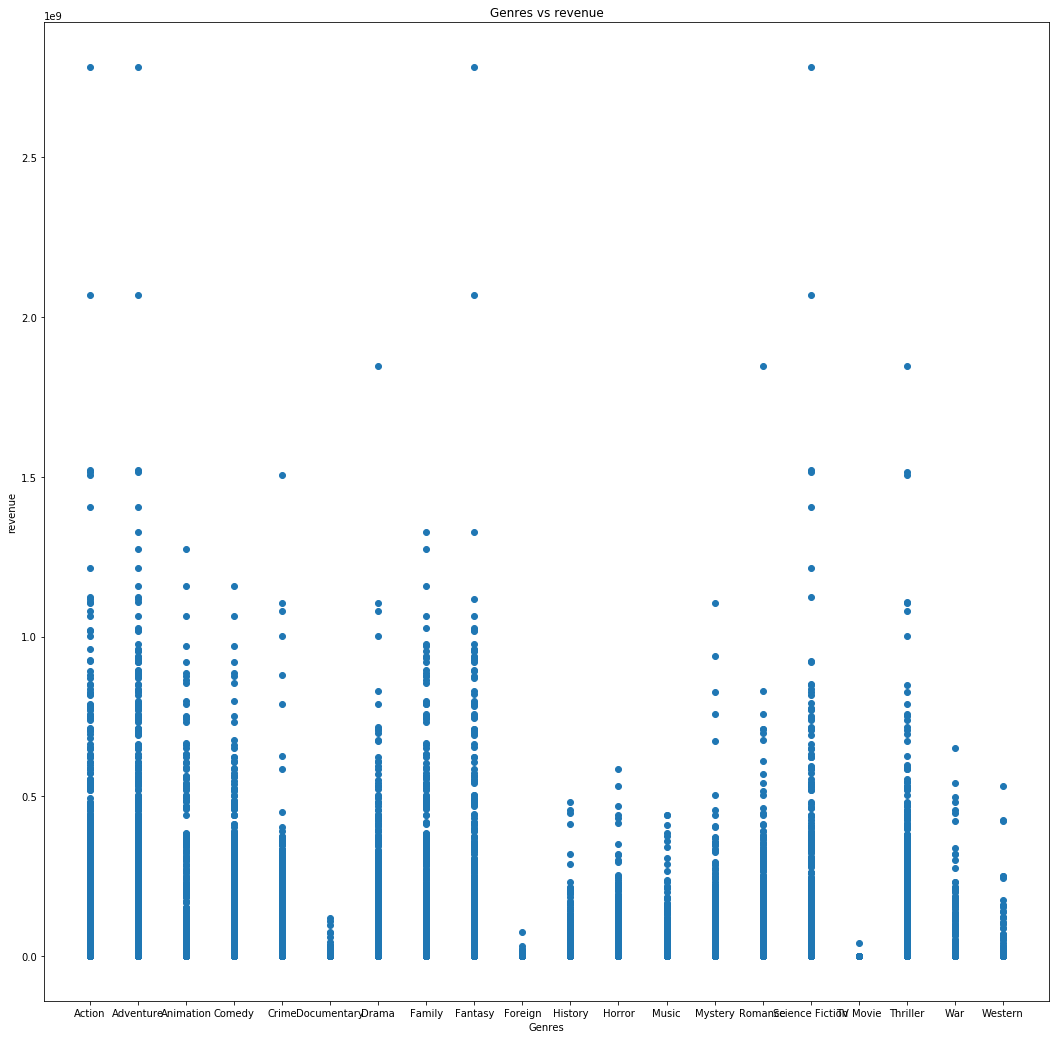

In [22]:
scatter('revenue')

Hmmmm so it seems that some genres are earning more than others for example Action and Adventrue get more revenues while Foreign and Tv movie aren't getting much revenue.
what about the relation between the genre and runtime?, let's see.

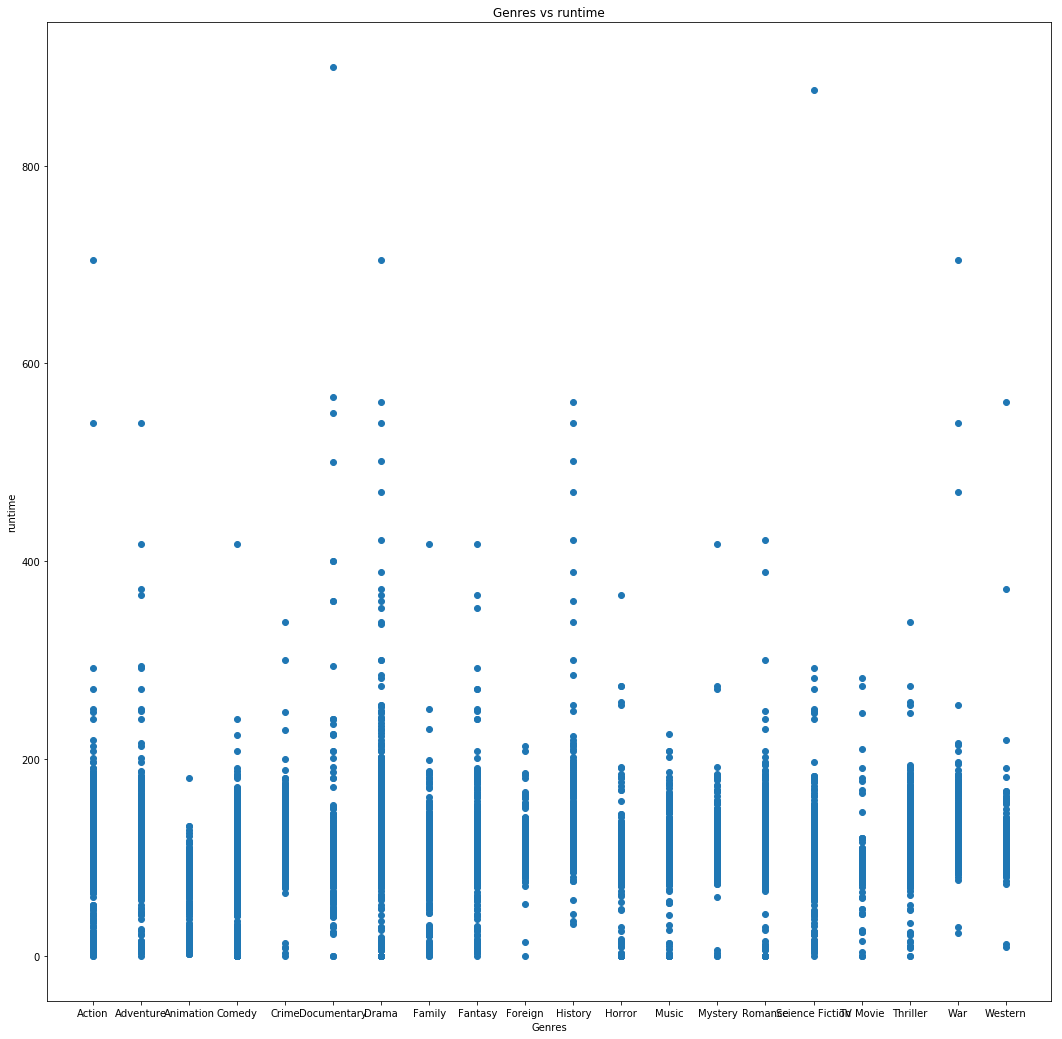

In [23]:
scatter('runtime')


Although there are some extreme points in each genre but we can clearly see that some genres runtime tend to be lenghty like Drama for ex (maybe the buildup in this genre takes time).
Now let's check the relation btween genres and vote_average.

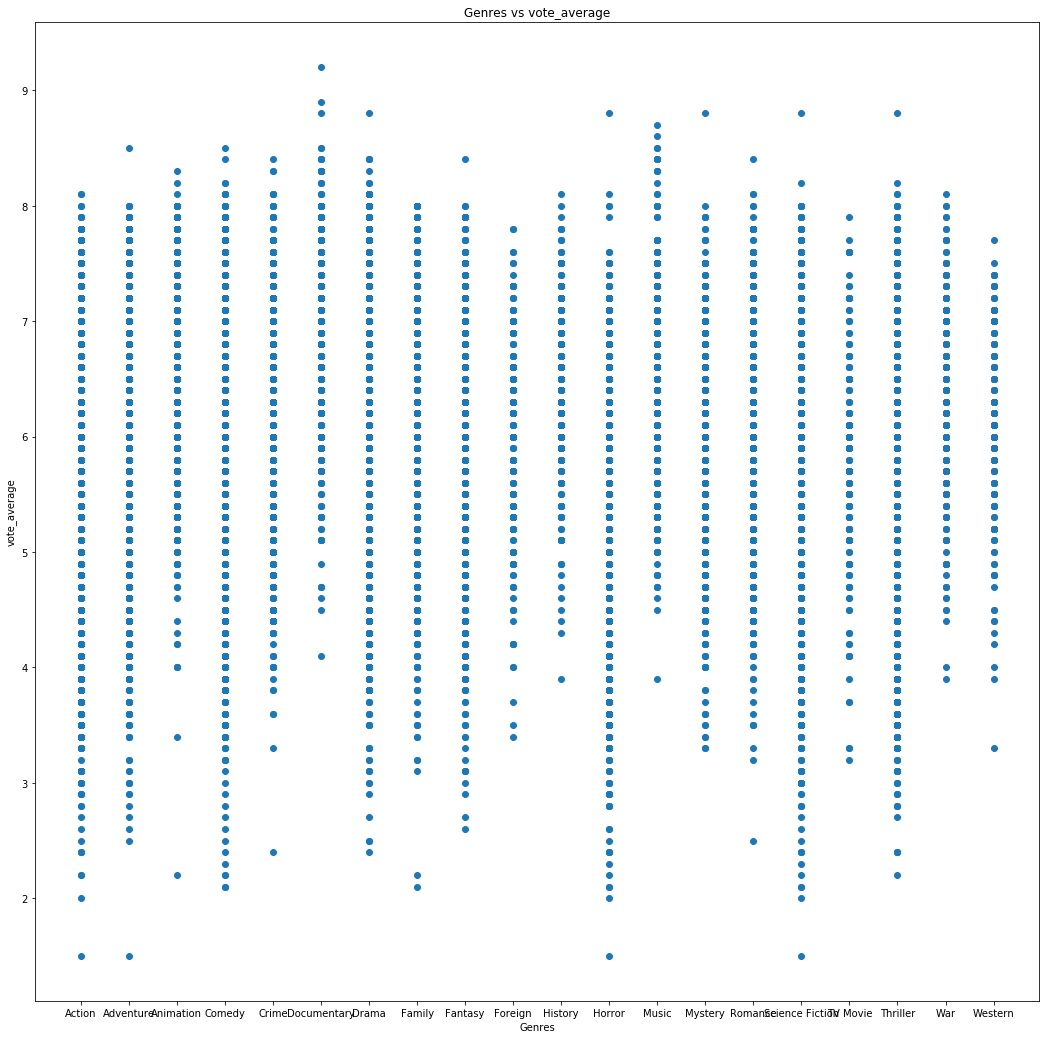

In [24]:
scatter('vote_average')

Hmmm it seems that although every genre has its fans but some genres like Doucmetray tend to be rated higher.
What about which genres get more vote_count.

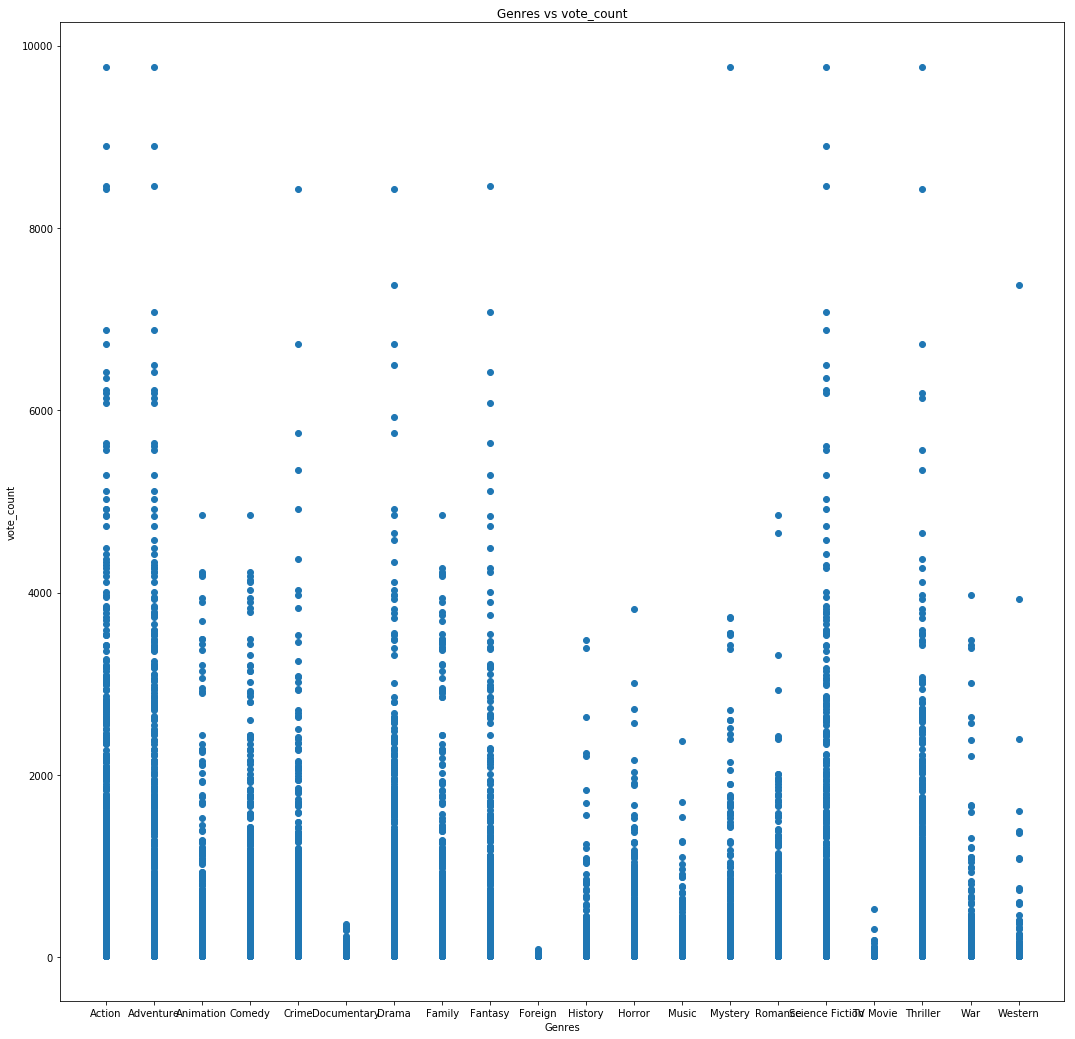

In [25]:
scatter('vote_count')

So there are more peole willing to vote in specifiec genres like Action and Adventrue.

<a id='conclusions'></a>
## Conclusions
We tried to answer the questions we asked about the data
Some of our findings were as follow:
The most popular 2 genres were Action and Adventure (according to avg rating and the vote count and some other attributes).
Doucmentaries weren't that popular although some of them got high avg rating!!
The number of movies proudced by genre is getting higher every year although some genres like westren is fluctuating.

## Limitations
I want to assert that the answer was based on the visuals i created and some descriptive statics and i didn't use inferential statistics or machine learning to complete this project(which are more powerful tools).
Also to get more accurate answers intesive investigation should have been done to check more on the relations between the genres and other attributes.
Some findings in our investigation requires us to broaden our scope to get an accurate answer which we can't do given the data we were given and how limited it is.
I also foucsed only in investigating around genres which limits the potential of the findings we can reach by broadening our scope

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0